<a href="https://colab.research.google.com/github/Dobarri/DL_CV_study/blob/main/w3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**분류(classification)**

분류(classification)는 regression과 함께 ml에서 가장 기초적인 데이터 분석 방법 중 하나입니다. classification이란 말 그대로 데이터가 어느 Category에 해당하는지 판단하는 문제에요.

앞의 Regression에서는 loss를 측정할 때 MSE(Mean Squared Error)를 사용했었죠. 실수값을 반환했어요. 분류에서는 같은 원리로 **예측이 얼마나 정답을 맞혔는지에 대한 정확도**를 측정합니다. 
보통 퍼센트(%)로 나타내고요.


**지도학습**과 **비지도학습**에 대해 알아보겠습니다.

- 지도학습(Supervised learning) : 정답을 알려주며 학습시키는 것

- 비지도학습(unsupervised learning) : 정답을 알려주지 않고 비슷한 데이터들을 군집화 하는 것


이번 chapter에서는 정답을 같이 학습시켜주는 지도학습(supervised learning)에 대해서만 다루겠습니다!


-


#**1. 이항 분류(binary classification)**

이항 분류란 말 그대로 정답의 분류가 두 개인 분류입니다. 정답이 두 가지로만 나오는 거에요. 대표적인 예로 고양이와 강아지를 분류하는 문제가 있어요. Deep learning이 나오기 전까지는 강아지와 고양이를 분류하는 일이 매우 어려웠답니. 하지만 2012년 CVPR에 발표된 논문 <Cats and Dogs>에서 82.7%였던 Asirra Dataset의 분류 성적을 딥러닝을 이용한 이미지 처리 기법을 이용해 92.9%로 뛰어넘으면서 딥러닝은 계속 발전해왔다고 해요.

이항 분류를 다루어볼텐데 와인 데이터세트를 활용해서 분류를 해보겠습니다. 

와인 데이터에는 화이트와인, 레드와인 두 종류로 나누어져 있어요. 와인의 색을 보지않고 데이터를 통해 화이트와인인지 레드와인인지 분류해볼께요!!

우선 데이터셋을 불러옵니다.

이 데이터는 kers에 없기때문에 외부에서 불러오는 과정을 거쳐야해요.

데이터는 Red, white와인을 따로 불러와서 저장할께요.


In [1]:
import pandas as pd

red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print(red.head())
print(red.shape)
print(white.head())
print(white.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

데이터는 pandas를 이용해서 데이터프레임(dataframe)으로 읽어왔어요. 엑셀과 비슷하다고 보면 됩니다!

head()함수는 위에부터 5개 행을 보여줘요. 
tail()함수는 아래부터 5개 행을 보여줍니다. 

불러온 와인 데이터의 속성은 총 12가지로 되어있어요.

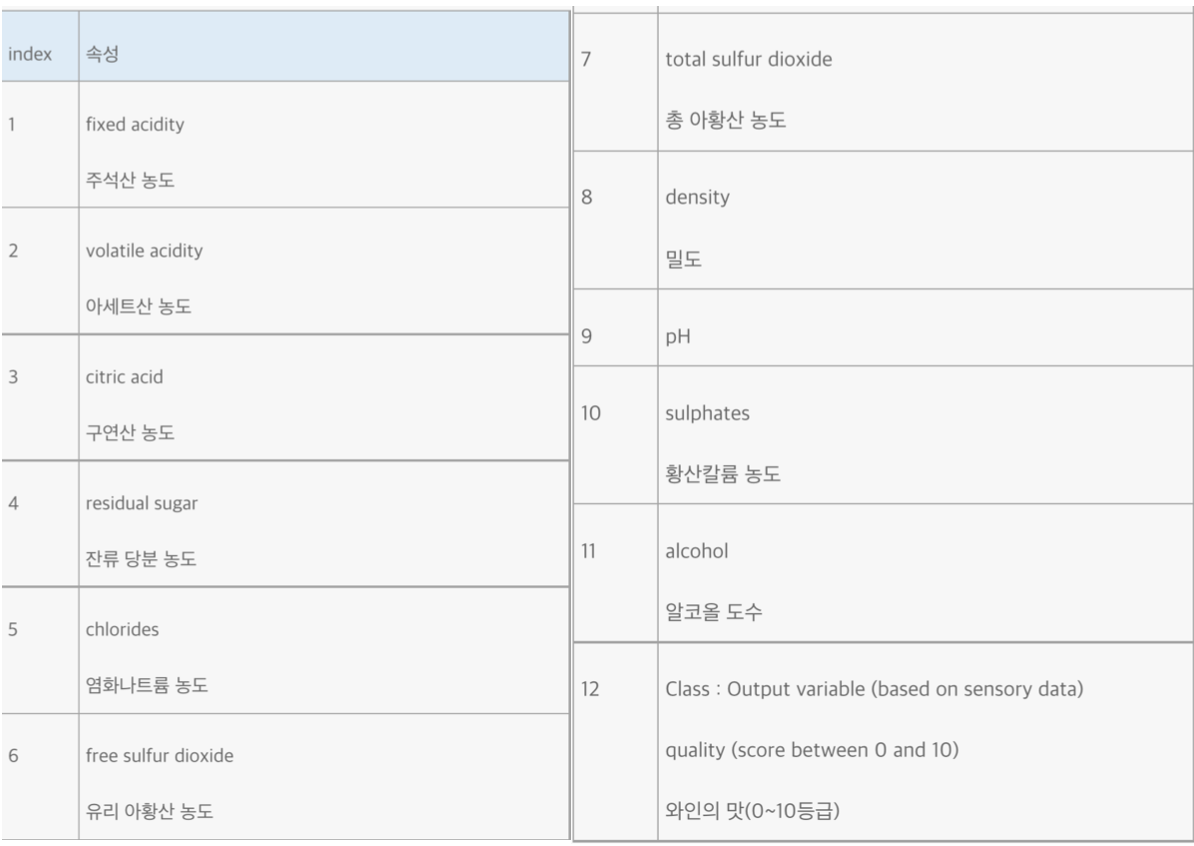

위에서 Red와인과 White와인 데이터를 따로 불러왔었죠??

그런데 모델을 학습시킬때 두 데이터를 합쳐서 학습시켜야 합니다. 

그래서 각 데이터의 마지막 column에 red,white를 표시하는 값을 추가해주고 두 데이터를 합쳐볼께요.

레드와인을 0, 화이트와인을 1로 표시할께요~

In [2]:
#라벨
red['type'] = 0
white['type'] = 1
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2 

그리고 두 데이터를 합쳐줄꺼에요.

그리고 **describe()함수**로 데이터프레임의 간단한 통계 정보를 확인해보겠습니다. 기본적으로 column에 대해 요약이 수행되구요 NaN값은 제외되고 데이터 요약이 수행됩니다.

In [3]:
#합치기
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

- pd.concat() : 데이터프레임을 물리적으로 이어 붙여주는 함수
- pd.merge() : 각 데이터에 존재하는 고유값(key)을 기준으로 병합할 때 사용
- .join() : merge함수와 비슷하지만 행 인덱스를 기준으로 결합한다는 차이



우리가 데이터 맨 마지막 type에 레드와인은 0, 화이트와인은 1로 값을 넣어주었죠??

그래서 min값이 0, max값이 1로 나오는 것을 확인할 수 있네요!

그런데 mean값이 0.75정도로 나오는 것을 보니 화이트와인(1)값이 더 많이 들어있다고 추측할 수 있어요. 한 번 시각화해서 봅시다.

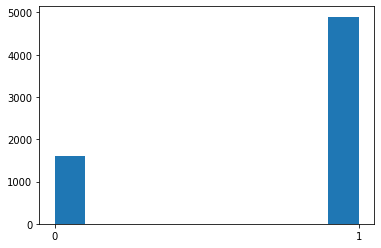

1    4898
0    1599
Name: type, dtype: int64


In [4]:
import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

위의 코드에서 xticks()는 그래프 축에 간격을 구분하기 위해 표시하는 눈금 표시 함수에요.

value_counts()함수는 종류별 갯수를 세서 반환해주는 함수에요.

예상대로 화이트와인(1)의 데이터가 더 많이 있네요. 대충 3배정도 더 많은 것을 확인할 수 있어요. 학습을 진행하기 위해 train, test 데이터로 나누어야 하는데 나눌때 category가 비슷한 비율로 들어가도록 섞어주어야해요. 보통 3:1정도 비율의 데이터는 별다른 처리를 하지 않고 랜덤하게 섞어도 거의 문제가 없답니다!!


그런데 데이터를 섞기 전, 해야할 일이 있어요. 바로 **데이터 정규화(data normalization)**입니다.

정규화를 할 때 데이터가 숫자가 아닌 값이면 에러의 원인이 될 수 있어요...

그래서 우선 데이터가 어떤 구성으로 되어있는지 info함수를 사용해서 파악해볼께요.

In [5]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


data type을 보면 float64, int64로 되어있고 모두 null값도 없는 것을 확인 할 수 있네요!

정규화를 진행해도 괜찮을 것 같아요.



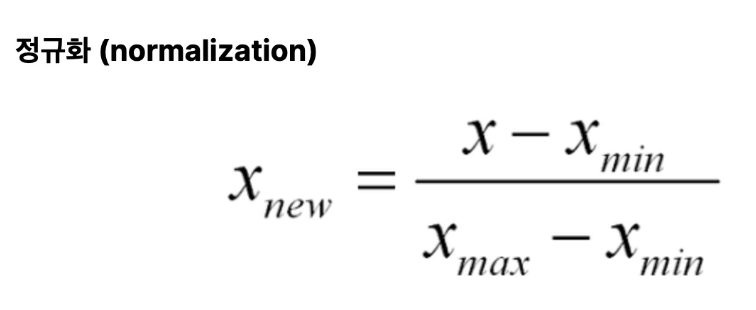

In [6]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

정규화를 진행하고 describe함수로 확인해보니 모든 속성값들에 대한 min, max값이 각각 0,1이 된 것을 볼 수 있네요.

이제 데이터를 랜덤하게 섞고, 학습을 위해 Numpy array형태로 변환하겠습니다.

In [7]:
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
717        0.264463          0.126667     0.246988        0.278374   0.054817   
4254       0.305785          0.140000     0.144578        0.142638   0.081395   
3710       0.074380          0.393333     0.054217        0.006135   0.018272   
1794       0.231405          0.193333     0.144578        0.021472   0.091362   
1297       0.280992          0.300000     0.084337        0.023006   0.091362   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
717              0.114583              0.347926  0.252362  0.186047   
4254             0.083333              0.251152  0.165028  0.333333   
3710             0.013889              0.006912  0.002121  0.449612   
1794             0.076389              0.262673  0.144399  0.465116   
1297             0.048611              0.052995  0.117987  0.488372   

      sulphates   alcohol   quality  type  
717    0.157303  0.159420  0.333333   1.0 

- .sample(frac=1) : 전체 데이터프레임에서 frac 파라미터로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이터프레임 만듦. (frac=1이므로 100% 모든 데이터를 뽑아서 섞음)
- to_numpy() : 데이터프레임을 numpy array로 변환

이제 train data와 test data로 나누겠습니다. 

여기서는 train, test만 분리하면 됩니다.

validation data는 keras에서 알아서 test data에서 분리할 꺼에요.

전체의 80%를 train data로 하기 위해 우선 index값을 저장하고 분리합니다. 

In [8]:
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)
print(train_idx)
print("\n")

train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_x[0])
print(train_y[0])
print(test_x[0])
print(test_y[0])

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)
print(train_y[0])
print(test_y[0])

5197


[0.26446281 0.12666667 0.24698795 0.27837423 0.05481728 0.11458333
 0.34792627 0.25236167 0.18604651 0.15730337 0.15942029 0.33333333]
1.0
[0.32231405 0.36       0.02409639 0.04907975 0.12458472 0.08333333
 0.08986175 0.20609215 0.48062016 0.1741573  0.2173913  0.33333333]
0.0
[0. 1.]
[1. 0.]


- .to_categorical() : 행렬을 원-핫 인코딩(One-Hot Encoding) 방식으로 바꿈 -> 정수를 인덱스로 간주하고 해당 위치에 1을 부여
- num_classes : 정답 클래스 갯수

이제 딥러닝 학습을 진행해보겠습니다. 앞에 regression에서 했던 sequential모델을 사용할께요.

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


classification에서는 마지막 dense layer의 Activation function으로 'softmax'함수를 사용했습니다. softmax함수는 분류에서 가장 많이 사용되는 함수입니다. 이 함수를 통과한 결과값들은 총합이 1인 확률값으로 표시되기 때문에 사용합니다. 

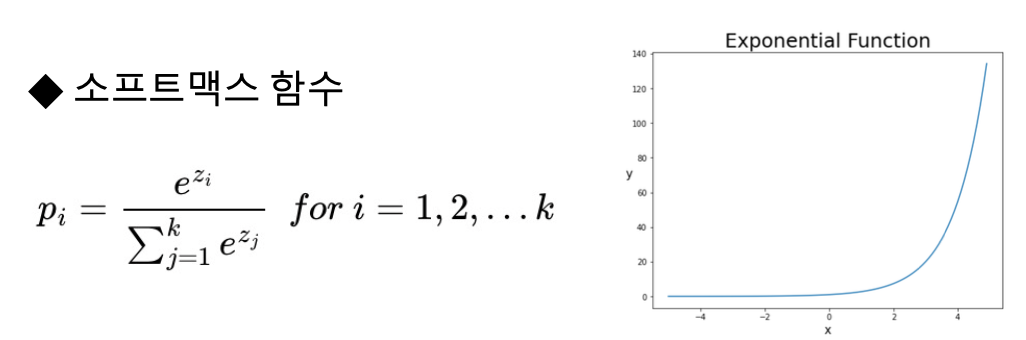

소프트맥스는 말처럼 max함수보다 소프트하다는 뜻이에요. 큰 값은 더 강조하고 작은 값은 더 약화시키는 효과가 있어요. 

예를 들어, 

[2,1,0]이 있다고 해봅시다.

이때 max함수를 사용하면 [2,0,0]이 되고
softmax함수를 사용하면 [.067, 0.24, 0.09]가 되요. 전체 합이 1로 나타나죠.

softmax는 분류문제, RNN에서 다음 토큰 예측 등 결과값이 확률로 필요한 경우에 사용됩니다. 

여기서는 레드 와인일 확률과 화이트 와인일 확률로 나타날꺼에요.

여기서 크로스엔트로피(crossentropy)라는 개념이 나와요.

우선 엔트로피란 정보이론에서는 정보량을 나타내기 위한 단위로 사용해요. 쉽게 말하면 불확실한 정보를 숫자로 정량화하는 도구에요. 


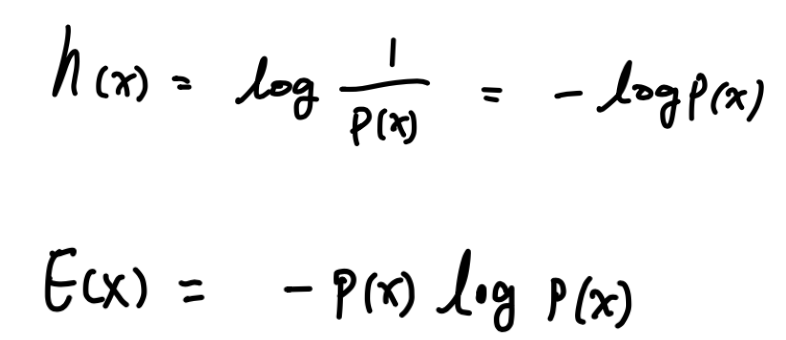

- 낮은확률값이란 큰엔트로피를가진 사건은 드물게 발생한다는 것과 같은 뜻이고 "귀한 정보"라는 의미에요.
- 높은확률값이란 작은엔트로피를가진 사건은 자주 발생한다는 것과 같은 뜻이고 “흔한 정보”라는 의미랍니다.

그리고 categorical_Crossentropy라는 것이 나와요. 이것은 Entropy와 조금 다른 부분이 있는데 

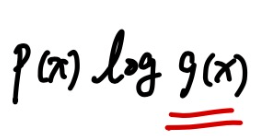

이렇게 확률부분인 p(x)자리에 q(x)가 곱해져요. 여기서 q(x)는 모델이 각 클래스로 분류한 확률값을 의미해요. 그래서 앞에 cross라는 단어가 붙는답니다. categorical은 범주에 쓰이는 분류라는 뜻이에요. 

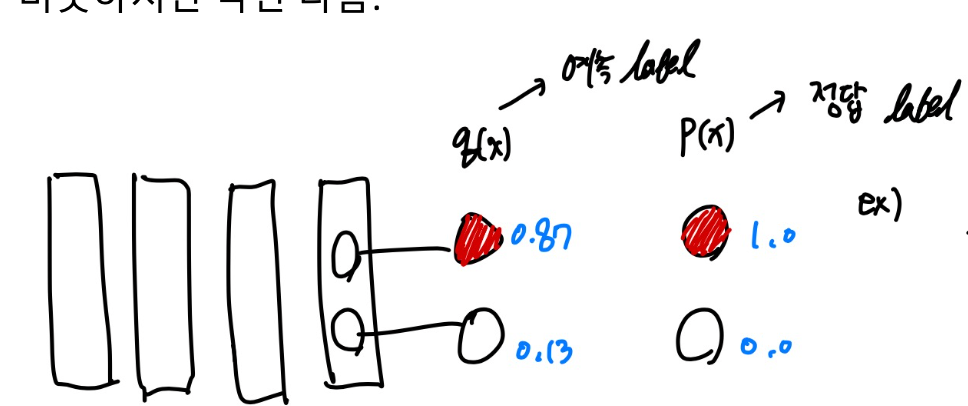

위의 그림에서 보면 q,p에서 나온 확률값을 Cross-entropy했을 떄 4개의 class가 나올 수 있어요. 그래서 해결책이 모든 범주에 대해 평균을 구하는 거에요!!

그렇게 구하는 categorical_crossentropy식을 보면

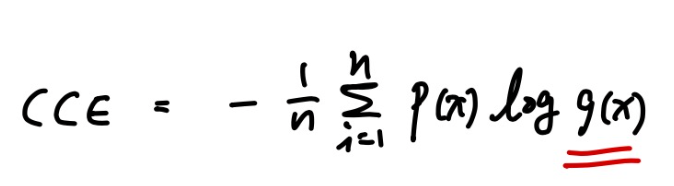

이렇게 나타낼 수 있어요.

위의 그래프에 있는 값을 이용해서 CCE를 구해보면


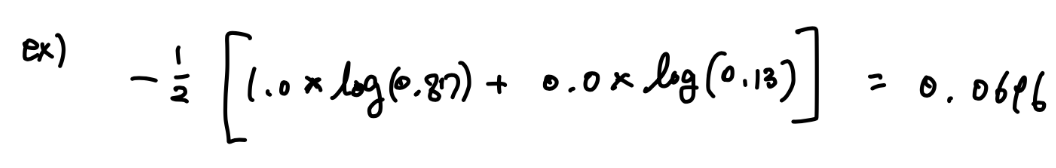

이렇게 구할 수 있어요.

그런데 이 값이 높은 것인지 낮은 것인지 가늠하기가 힘들어요. 

그래서 이번에 정답이 화이트와인일 떄, 레드 와인으로 예측할 확률을 0.6, 화이트 와인으로 예측할 확률을 0.4로 해서 cce를 계산해볼께요. 위에서보다 안 좋은 성능이므로 위에서 구한 값보다 높은 값이 나오는 것이 맞겠죠?

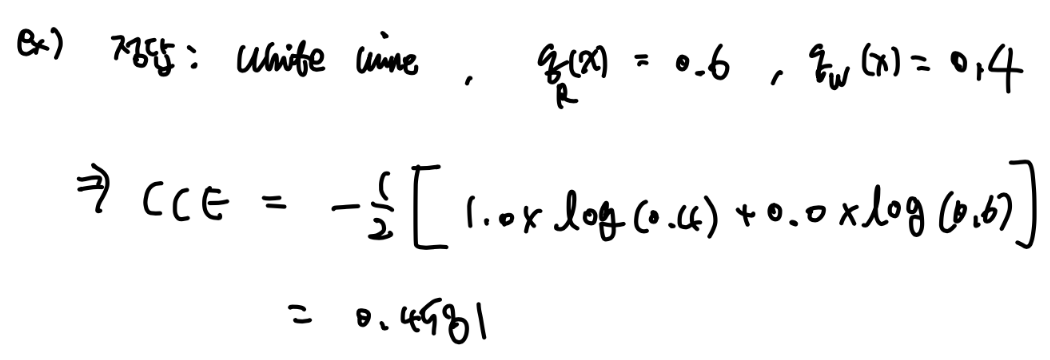

대략 6배정도 높은 값이 나오는 것을 확인할 수 있어요.

여기서 한 가지 알아둘 점은 우리가 잘못 분류한 라벨에는 0이 곱해지기 떄문에 이 값은 무시하고, 정답 라벨에 대한 예측만 남겨도 값이 달라지지 않는다는 점 입니다. 


그리고 compile함수의 parameter에 **'accuracy'**가 추가되었습니.

분류 문제에서는 정확도로 성능을 측정하기 때문에 정확도를 설정하는 것은 필수입니다. 

이렇게 하면 모델의 학습 히스토리에 Loss와 accuracy가 같이 저장됩니다. 

이제 model을 fit함수로 학습시켜볼께요!

In [10]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 5s 9ms/step - loss: 0.1649 - accuracy: 0.9261 - val_loss: 0.0668 - val_accuracy: 0.9885
Epoch 2/25
122/122 [==============================] - 1s 7ms/step - loss: 0.0637 - accuracy: 0.9836 - val_loss: 0.0488 - val_accuracy: 0.9908
Epoch 3/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0629 - accuracy: 0.9841 - val_loss: 0.0507 - val_accuracy: 0.9869
Epoch 4/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0688 - accuracy: 0.9831 - val_loss: 0.0586 - val_accuracy: 0.9915
Epoch 5/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0511 - accuracy: 0.9872 - val_loss: 0.0437 - val_accuracy: 0.9900
Epoch 6/25
122/122 [==============================] - 1s 7ms/step - loss: 0.0635 - accuracy: 0.9823 - val_loss: 0.0401 - val_accuracy: 0.9915
Epoch 7/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0447 - accuracy: 0.9890 - val_loss: 0.0308 - val_accuracy: 0.9938
Epoch 

25번째 epoch에서는 accuracy가 거의 100%에 가까운 모습을 보이는 것을 확인할 수 있습니다. 

이것을 시각화해봅시다.

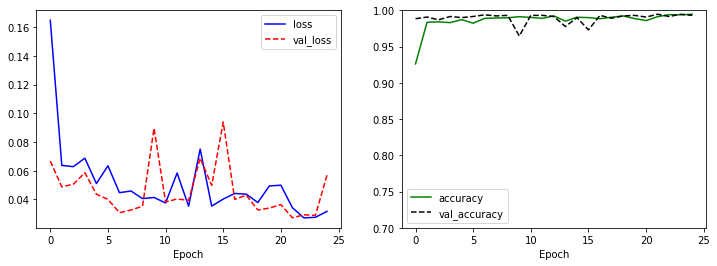

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

loss가 줄어드는 것을 보니 더 학습시키는 것을 반복해도 괜찮을 것 같네요.

그리고 evaluate함수로 모델에 Test data를 넣어 평가해봅시다!

In [12]:
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9954


[0.026552163064479828, 0.9953846335411072]

처음보는 test data에 대해서도 거의 100%에 가까운 성능을 보입니다.

#**2. 다항분류**

다항분류란 범주가 2개이상인 경우를 말합니다. 

앞에서 사용한 와인데이터에서 quality항목이 0~10의 숫자로 구분되어있기 때문에 이 항목을 다항분류의 범주로 사용해보겠습니다. 

우선 데이터가 어떤 비율로 구성되어있는지 확인해볼께요.

In [13]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


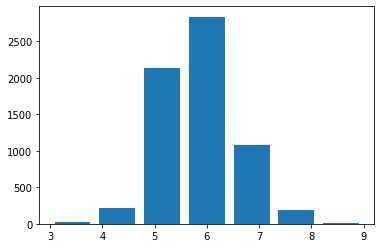

In [14]:
import matplotlib.pyplot as plt

plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

데이터의 양이 적고 범주가 7개로 너무 많습니다. 그리고 각 범주마다 데이터의 수가 많이 차이나서 모든 범주에 대해 분류하는 것은 어려울 것 같습니다. 그래서 데이터 수를 좀 맞춰주어서 3가지 범주로 분류해보겠습니다.

3-5는 나쁨, 6은 보통, 7-9는 좋음으로 분류하겠습니다. 

In [15]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


- .loc[ 행, 열 ] : 특정한 데이터의 인덱스를 골라내는 역할

new_quality에 대해 정보를 시각화해보면


In [16]:
print(wine['new_quality'].value_counts())

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


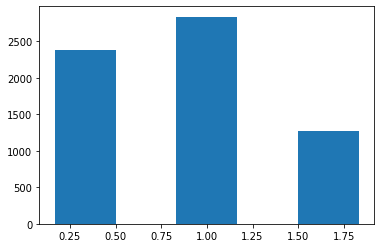

In [17]:
import matplotlib.pyplot as plt

plt.hist(wine['new_quality'], bins=3, rwidth=0.5)
plt.show()

categories마다 고른 데이터 갯수로 맞춰진 것을 볼 수 있습니다.

이제 데이터 정규화를 해보겠습니다.

new_quality로 3가지 범주로 바꾸어주었기때문에 quality항목은 삭제를 하는 함수를 만들겠습니다. 

new_quality를 예측하는데 quality는 직접적인 관련이 있기때문에 더 학습을 잘 시키기 위해(overfitting을 방지하기 위해) 삭제하겠습니다.

In [18]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

그리고 학습데이터와 테스트데이터를 80:20으로 분리해주겠습니다.

In [19]:
train_idx = int(len(wine_np) * 0.8)
print(train_idx)
train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

5197


그리고 to_categorical함수로 one-hot encoding을 해주겠습니다.

In [20]:
import tensorflow as tf

train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)

이제 학습을 진행하겠습니다.

앞의 모델과 달라진점이라면 마지막 layer의 unit수가 2에서 3으로 바뀐점이겠네요. 구하는 범주가 3가지로 바뀌었기 때문이죠.

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

#학습
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48)                624       
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 3)                 39        
                                                                 
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


122/122 [==============================] - 1s 4ms/step - loss: 0.4804 - accuracy: 0.7921 - val_loss: 0.4751 - val_accuracy: 0.8169
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.7945 - val_loss: 0.4325 - val_accuracy: 0.8169
Epoch 3/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4259 - accuracy: 0.7965 - val_loss: 0.4163 - val_accuracy: 0.8169
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7950 - val_loss: 0.3979 - val_accuracy: 0.8169
Epoch 5/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8009 - val_loss: 0.3921 - val_accuracy: 0.8254
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8091 - val_loss: 0.3992 - val_accuracy: 0.8108
Epoch 7/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8019 - val_loss: 0.4070 - val_accuracy: 0.8238
Epoch 8/25
122/12

학습 결과를 시각화해보면

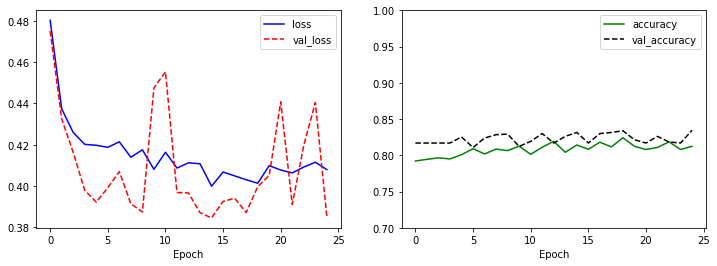

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

분류해야하는 class가 늘어나서인지 loss가 들쭉날쭉이네요...
validation loss가 한 번씩 튈때가 보입니다. 

계속 학습하면 loss는 감소하겠지만 val_loss가 증가하여 overfitting이 될 수 있겠네요.

이제 test data로 모델을 평가해봅시다.

In [23]:
model.evaluate(test_x, test_y)

41/41 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8154


[0.38791143894195557, 0.8153846263885498]

accuracy가 test데이터와 거의 유사하게 나온 것을 확인할 수 있습니다. 

여기서 모델 성능을 높이려면 네트워크 Layer를 늘리거나 lr을 조정하는 등 다른 방법을 찾아봐야겠네요.

-

#**3. Fashion MNIST**

- MNIST : 손으로 쓴 숫자 글씨를 모아놓은 데이터셋
- Fashione MNIST : 옷, 신발, 가방등의 이미지 데이터셋

Fashion MNIST데이터 셋에는 총 10가지의 Class를 가지는 이미지로 이루어져있습니다. 이미지는 28x28픽셀이고 총 70,000장입니다. 이 중 60,000장이 train data이고 10,000장이 test data 입니다.

범주는 아래 그림과 같습니다.

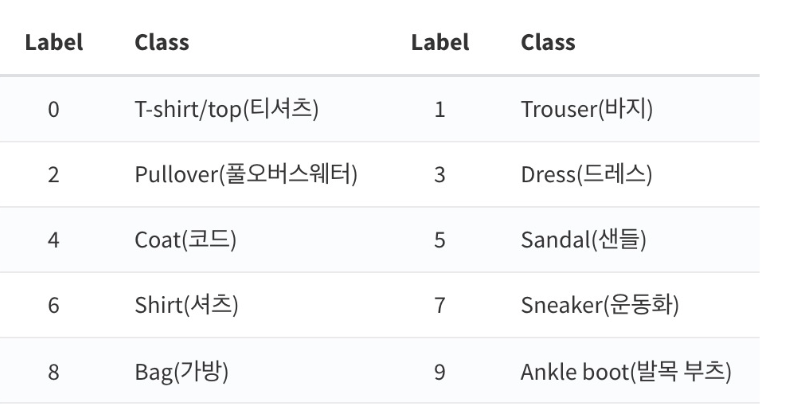

우선 데이터셋을 불러오겠습니다. Fashion MNIST dataset은 keras에 있습니다.

In [24]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

print(len(train_x), len(test_x))

4431872/4422102 [==============================] - 0s 0us/step
60000 10000


이미지가 어떻게 생겼는지 확인해보죠.


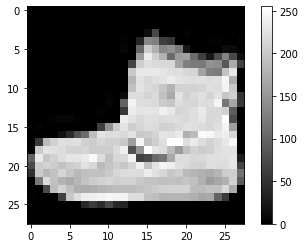

9


In [25]:
import matplotlib.pyplot as plt

plt.imshow(train_x[0], cmap='gray')
plt.colorbar()
plt.show()
print(train_y[0])

0번째 있는 이미지입니다. 부츠처럼 생겼는데요 범주를 확인해보니 9라고 나옵니다. 위의 사진에서 범주 9번이 발목 부츠라고하니 이미지와 범주가 일치하는 것을 확인할 수 있네요.

- .imshow() : 이미지를 그래프 형태로 표시
- colorbar() : 색상값 정보 bar형태로 표시

이번엔 데이터를 정규화 해보겠습니다. 이미지 픽셀의 최솟값과 최대값을 여기서는 알고 있으므로(0,255) 각 픽셀값을 255로 나누면 0.0~1.0사이 값을 가지게 될 것입니다.

In [26]:
train_x = train_x/255.0
test_x = test_x/255.0

print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

정규화가 잘 된 것을 확인할 수 있네요.

앞에서는 One-hot encoding을 해서 해당되는 인덱스에만 1이고 나머지는 0이되도록 바꾸어줬었죠??

그런데 여기서는 안할겁니다. 왜냐하면 0이 너무 많기 때문에 비효율적이기 때문입니다. 많은 희소 행렬(sparse matrix)를 사용하는 것은 메모리 낭비입니다. 

그래서 여기서는 0이 아닌 숫자가 있는 위치와 그 숫자 값만 저장하도록 하겠습니다.

예를들면, 

[0,0,0,0,0,0,0,0,0,1] -> 9

[0,0,0,0,1,0,0,0,0,0] -> 4

이것을 sparse_categorical_crossentropy라고 합니다. 이걸 사용하면 별도의 전치리없이 희소 행렬을 나타내는 데이터를 정답 행렬로 사용할 수 있습니다.

또한 영상이 28x28의 2차원 array이기 때문에 **Flatten layer**를 사용하여 1차원 vector로 정렬해주겠습니다.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


이제 학습을 진행하겠습니다.

In [28]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5229 - accuracy: 0.8187 - val_loss: 0.4749 - val_accuracy: 0.8314
Epoch 2/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.8586 - val_loss: 0.3787 - val_accuracy: 0.8640
Epoch 3/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3471 - accuracy: 0.8749 - val_loss: 0.3578 - val_accuracy: 0.8721
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3229 - accuracy: 0.8817 - val_loss: 0.3931 - val_accuracy: 0.8580
Epoch 5/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.8875 - val_loss: 0.3422 - val_accuracy: 0.8793
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8937 - val_loss: 0.3389 - val_accuracy: 0.8809
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2731 - accuracy: 0.8984 - val_loss: 0.3228 - val_accuracy:

시각화해보면

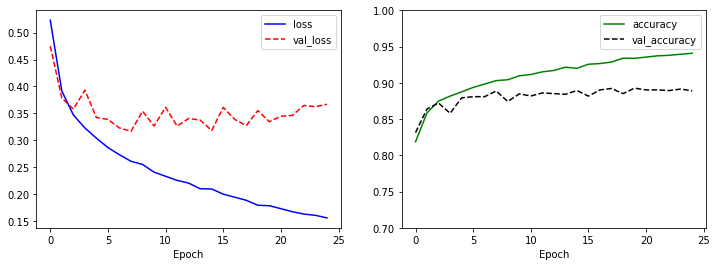

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

loss는 감소하는데 validation loss는 증가하는 것을 볼 수 있네요. overfitting이 되므로 그 전에 학습을 종료해주는 게 좋을 것 같습니다.

평가를 해본 후,
앞에서 배웠던 Callback함수를 사용해서 적절한 시점에 학습을 종료시켜볼께요.

In [30]:
#일단 평가
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8801


[0.40979430079460144, 0.8801000118255615]

그래도 91%의 정확도를 보여주네요. 

이번엔 callback함수를 사용해서 학습시켜보죠.

patience는 3으로 적용해볼께요.

In [31]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1506 - accuracy: 0.9434 - val_loss: 0.3758 - val_accuracy: 0.8934
Epoch 2/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1491 - accuracy: 0.9438 - val_loss: 0.3806 - val_accuracy: 0.8899
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1451 - accuracy: 0.9458 - val_loss: 0.3917 - val_accuracy: 0.8868
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9472 - val_loss: 0.3842 - val_accuracy: 0.8863


12번 째 에포크에서 반복이 종료되었네요. 

시각화 해보면

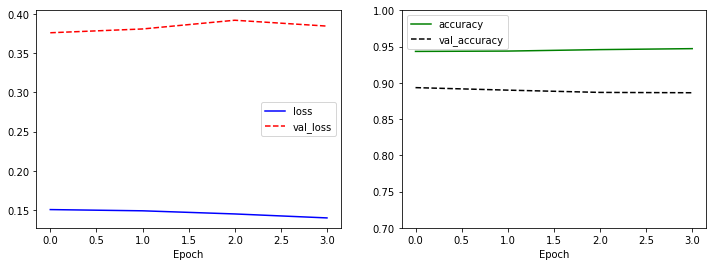

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

아까보다는 조금 나아진 모습이지만 그래도 Val_loss가 증가하는 모습이 보이네요.

평가해봅시다.

In [33]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8810


[0.4236018657684326, 0.8809999823570251]

오히려 accuracy가 감소하였네요......

8번 정도만 학습하면 더 좋은 결과를 얻을 수 있을까요?

In [34]:
history = model.fit(train_x, train_y, epochs=8, validation_split=0.25)

Epoch 1/8
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1394 - accuracy: 0.9472 - val_loss: 0.3986 - val_accuracy: 0.8869
Epoch 2/8
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1359 - accuracy: 0.9488 - val_loss: 0.3874 - val_accuracy: 0.8903
Epoch 3/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1320 - accuracy: 0.9506 - val_loss: 0.3985 - val_accuracy: 0.8862
Epoch 4/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1297 - accuracy: 0.9499 - val_loss: 0.3757 - val_accuracy: 0.8900
Epoch 5/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1253 - accuracy: 0.9534 - val_loss: 0.3988 - val_accuracy: 0.8900
Epoch 6/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1214 - accuracy: 0.9545 - val_loss: 0.4013 - val_accuracy: 0.8911
Epoch 7/8
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1201 - accuracy: 0.9559 - val_loss: 0.4205 - val_accuracy: 0.8885

In [35]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8852


[0.45361995697021484, 0.885200023651123]

그러네요. 92%로 조금 더 좋은 성능을 보이는 것을 확인할 수 있었습니다!!